Accuracy de l'arbre de décision (par défaut): 0.79
Accuracy de l'arbre de décision (profondeur limitée): 0.79
Accuracy de la régression logistique: 0.87


<ipython-input-4-3aeb0bc4acb6>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


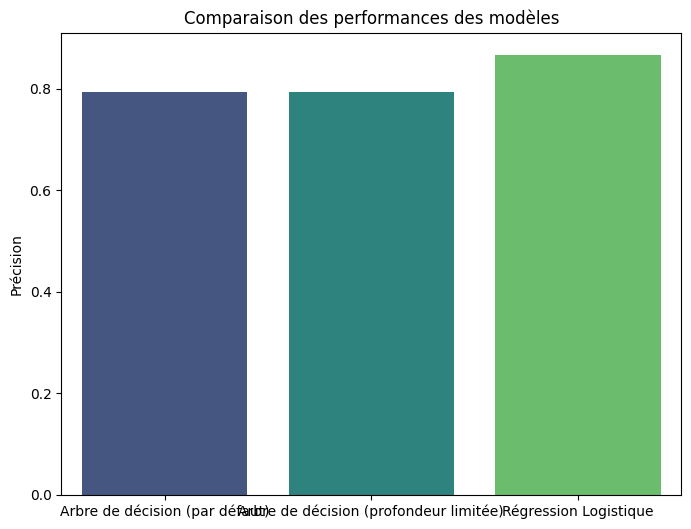

In [4]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Charger les données MNIST
mnist = fetch_openml('mnist_784', version=1)

# Séparer les données et les labels
X = mnist.data
y = mnist.target.astype(int)  # Convertir les labels en int

# Utiliser un sous-ensemble de données pour accélérer les tests (par exemple 10% des données)
X = X.sample(frac=0.1, random_state=42)
y = y.loc[X.index]

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle 1: Arbre de décision avec paramètres par défaut
dt_default = DecisionTreeClassifier(random_state=42, max_depth=10)  # Limiter la profondeur
dt_default.fit(X_train, y_train)

# Modèle 2: Arbre de décision avec une profondeur maximale
dt_limited_depth = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_limited_depth.fit(X_train, y_train)

# Modèle de régression logistique
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)

# Prédictions pour les 3 modèles
y_pred_dt_default = dt_default.predict(X_test)
y_pred_dt_limited_depth = dt_limited_depth.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

# Calculer la précision de chaque modèle
accuracy_dt_default = accuracy_score(y_test, y_pred_dt_default)
accuracy_dt_limited_depth = accuracy_score(y_test, y_pred_dt_limited_depth)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Afficher les résultats
print(f"Accuracy de l'arbre de décision (par défaut): {accuracy_dt_default:.2f}")
print(f"Accuracy de l'arbre de décision (profondeur limitée): {accuracy_dt_limited_depth:.2f}")
print(f"Accuracy de la régression logistique: {accuracy_logreg:.2f}")

# Visualisation des résultats comparatifs
accuracies = [accuracy_dt_default, accuracy_dt_limited_depth, accuracy_logreg]
models = ['Arbre de décision (par défaut)', 'Arbre de décision (profondeur limitée)', 'Régression Logistique']

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparaison des performances des modèles')
plt.ylabel('Précision')
plt.show()



Dans cette étape, nous pouvons conclure sur la base des résultats de la précision obtenus pour chaque modèle :

L'arbre de décision avec les paramètres par défaut pourrait montrer un bon ajustement sur l'ensemble d'entraînement, mais il peut souffrir de surapprentissage (overfitting).

L'arbre de décision avec la profondeur limitée devrait être plus généralisable et moins susceptible de surapprentissage.

La régression logistique, bien qu'une approche plus simple, peut parfois offrir de bons résultats dans des problèmes de classification multi-classes comme celui-ci.

Tu peux choisir le modèle qui convient le mieux selon les résultats obtenus et la complexité du problème.